In [ ]:
!git clone https://github.com/salaniz/pycocoevalcap.git

Cloning into 'pycocoevalcap'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 808 (delta 1), reused 6 (delta 1), pack-reused 797
Receiving objects: 100% (808/808), 130.05 MiB | 35.72 MiB/s, done.
Resolving deltas: 100% (420/420), done.


In [ ]:
from pycocotools.coco import COCO
from pycocotools import coco

In [ ]:
import urllib.request
import zipfile
# Download the annotation : 
annotations_trainval2014 = 'http://images.cocodataset.org/annotations/annotations_trainval2014.zip'
image_info_test2014 = 'http://images.cocodataset.org/annotations/image_info_test2014.zip'


urllib.request.urlretrieve(annotations_trainval2014 , filename = 'annotations_trainval2014.zip' )
urllib.request.urlretrieve(image_info_test2014 , filename= 'image_info_test2014.zip' )

('image_info_test2014.zip', <http.client.HTTPMessage at 0x7f5aef9ac2b0>)

In [ ]:

with zipfile.ZipFile('annotations_trainval2014.zip' , 'r') as zip_ref:
  zip_ref.extractall( '/content/opt/cocoapi'  )  

try:
  os.remove( 'annotations_trainval2014.zip' )
  print('zip removed')
except:
  None

with zipfile.ZipFile('image_info_test2014.zip' , 'r') as zip_ref:
  zip_ref.extractall( '/content/opt/cocoapi'  )  

try:
  os.remove( 'image_info_test2014.zip' )
  print('zip removed')
except:
  None

epoch 18
Bleu_1: 0.616
Bleu_2: 0.423
Bleu_3: 0.283
Bleu_4: 0.190


In [ ]:
from pycocoevalcap.eval import COCOEvalCap
val_res_file = "captions_val2014_SAT_results.json"
coco_val = COCO("/content/opt/cocoapi/annotations/captions_val2014.json")
val_cocoRes = coco_val.loadRes("/content/"+val_res_file)
val_cocoEval = COCOEvalCap(coco_val,val_cocoRes)
val_score = val_cocoEval.evaluate() 

loading annotations into memory...
Done (t=0.38s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.08s)
creating index...
index created!
tokenization...
setting up scorers...
computing Bleu score...
{'testlen': 395266, 'reflen': 390696, 'guess': [395266, 354762, 314258, 273754], 'correct': [264685, 127555, 53846, 22639]}
ratio: 1.011697073939838
Bleu_1: 0.670
Bleu_2: 0.491
Bleu_3: 0.346
Bleu_4: 0.242
computing METEOR score...
METEOR: 0.222


In [ ]:
val_score

In [ ]:
import json
with open("/content/captions_val2014_SAT_results.json") as f:
  prediction = json.load(f)

In [ ]:
prediction[8]

{'caption': 'a baseball player is swinging a bat at a ball .', 'image_id': 192}

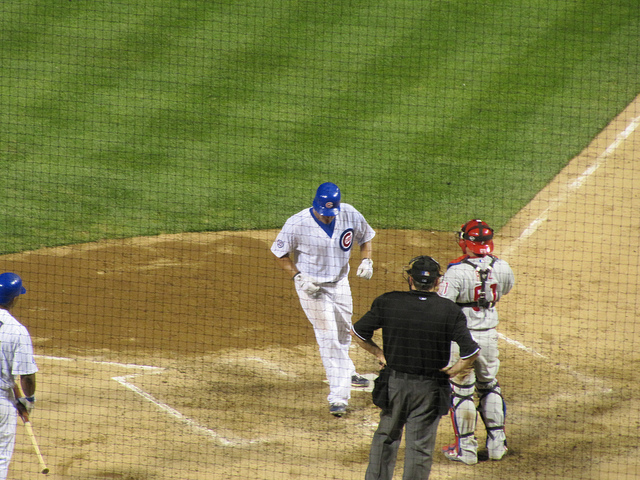

In [ ]:
from PIL import Image
from matplotlib import pyplot as plt
import urllib.request
%matplotlib inline
urllib.request.urlretrieve(  url = coco_val.imgs[192]['coco_url'],filename="image.jpeg")
Image.open("image.jpeg")

In [ ]:
eee